## Exercise 7

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

X = pd.read_csv("agaricus-lepiota.csv")
y = X.pop('edibility')
X_fac = pd.DataFrame(X)
for column in X.columns:
    X_fac[column] = pd.Categorical(X[column].factorize()[0])
X_fac = pd.DataFrame(preprocessing.scale(X_fac), columns=X_fac.columns)

km = KMeans(n_clusters=9)
km.fit(X_fac)
y_km = km.predict(X_fac)

centers = km.cluster_centers_

labels = km.labels_
metrics.rand_score(y, labels)

0.6001450313444576

In [20]:
import matplotlib.pyplot as plt

y_rand = np.zeros(18)
y_sil = np.zeros(18)
for i in range(2, 20):
    km = KMeans(n_clusters=i)
    km.fit(X_fac)
    y_km = km.predict(X_fac)
    centers = km.cluster_centers_
    labels = km.labels_
    y_rand[i - 2] = metrics.adjusted_rand_score(y, labels)
    y_sil[i - 2] = metrics.silhouette_score(X_fac, labels, metric='euclidean')
    print("n = %i, rand: %f, sil: %f" % (i, y_rand[i - 2], y_sil[i - 2]))

n = 2, rand: 0.459597, sil: 0.260971
n = 3, rand: 0.490072, sil: 0.277546
n = 4, rand: 0.380347, sil: 0.272177
n = 5, rand: 0.285421, sil: 0.304647
n = 6, rand: 0.256787, sil: 0.320647
n = 7, rand: 0.246812, sil: 0.353998
n = 8, rand: 0.241335, sil: 0.368649
n = 9, rand: 0.200938, sil: 0.332707
n = 10, rand: 0.197337, sil: 0.335250
n = 11, rand: 0.210973, sil: 0.326716
n = 12, rand: 0.208009, sil: 0.346854
n = 13, rand: 0.176785, sil: 0.317290
n = 14, rand: 0.118460, sil: 0.250461
n = 15, rand: 0.190914, sil: 0.337193
n = 16, rand: 0.171055, sil: 0.315874
n = 17, rand: 0.151283, sil: 0.311002
n = 18, rand: 0.134763, sil: 0.257295
n = 19, rand: 0.120242, sil: 0.265021


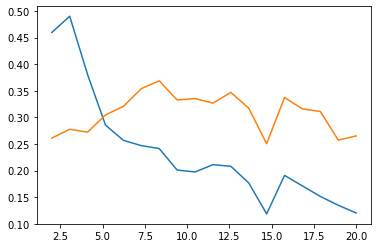

In [21]:
X_plot = np.linspace(2, 20, 18)
plt.plot(X_plot, y_rand)
plt.plot(X_plot, y_sil)
plt.show()

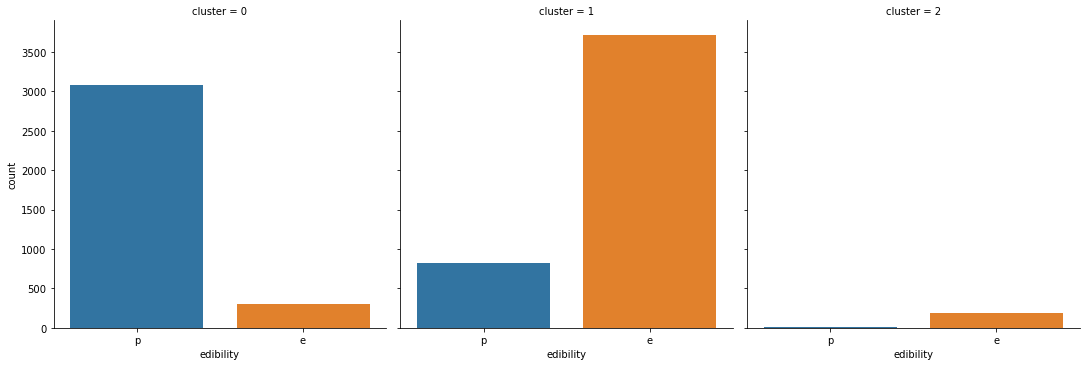

In [22]:
import seaborn as sns

k_rand = max(range(len(y_rand)), key=y_rand.__getitem__) + 2

kmeans = KMeans(n_clusters=k)
kmeans.fit(X_fac)
y_kmeans = kmeans.predict(X_fac)
centers = kmeans.cluster_centers_

cluster_df = pd.DataFrame()
cluster_df['cluster'] = y_kmeans
cluster_df['edibility'] = y
sns.catplot(col='cluster', y=None, x='edibility', data=cluster_df, kind='count')

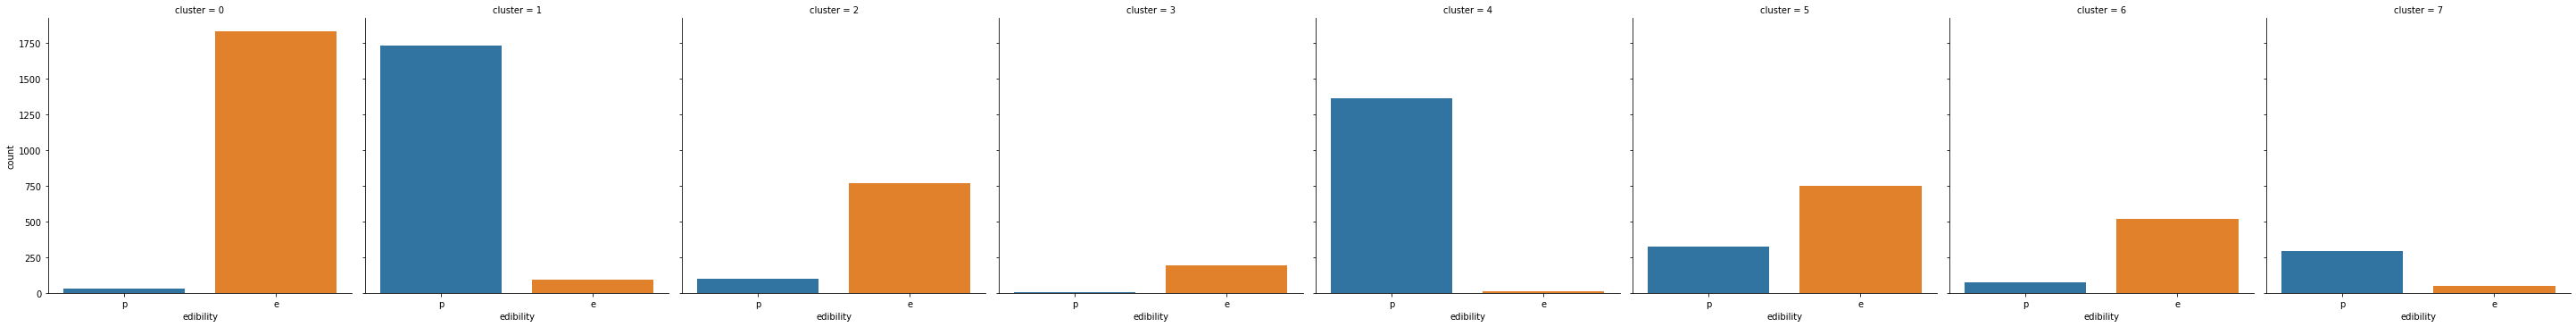

In [23]:
k_sil = max(range(len(y_sil)), key=y_sil.__getitem__) + 2

kmeans = KMeans(n_clusters=k_sil)
kmeans.fit(X_fac)
y_kmeans = kmeans.predict(X_fac)
centers = kmeans.cluster_centers_

cluster_df = pd.DataFrame()
cluster_df['cluster'] = y_kmeans
cluster_df['edibility'] = y
sns.catplot(col='cluster', y=None, x='edibility', data=cluster_df, kind='count')

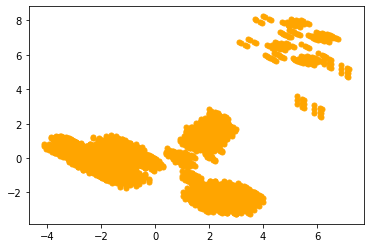

In [24]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X_fac)
X_pca = pca.transform(X_fac)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='orange', s=25)
plt.show()

In [25]:
y_pca_rand = np.zeros(18)
y_pca_sil = np.zeros(18)
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_pca)
    y_kmeans = kmeans.predict(X_pca)
    centers = kmeans.cluster_centers_
    labels = kmeans.labels_
    y_pca_rand[i - 2] = metrics.adjusted_rand_score(y, labels)
    y_pca_sil[i - 2] = metrics.silhouette_score(X_fac, labels, metric='euclidean')
    print("n = %i, rand: %f, sil: %f" % (i, y_pca_rand[i - 2], y_pca_sil[i - 2]))

n = 2, rand: 0.457596, sil: 0.260873
n = 3, rand: 0.365885, sil: 0.301918
n = 4, rand: 0.373946, sil: 0.315362
n = 5, rand: 0.271926, sil: 0.246739
n = 6, rand: 0.242431, sil: 0.245606
n = 7, rand: 0.236320, sil: 0.272512
n = 8, rand: 0.190423, sil: 0.212691
n = 9, rand: 0.174185, sil: 0.162903
n = 10, rand: 0.171164, sil: 0.169242
n = 11, rand: 0.171735, sil: 0.165788
n = 12, rand: 0.169411, sil: 0.157764
n = 13, rand: 0.140155, sil: 0.105601
n = 14, rand: 0.154458, sil: 0.142894
n = 15, rand: 0.125174, sil: 0.100055
n = 16, rand: 0.112501, sil: 0.095237
n = 17, rand: 0.110558, sil: 0.074869
n = 18, rand: 0.104424, sil: 0.073872
n = 19, rand: 0.098340, sil: 0.080242


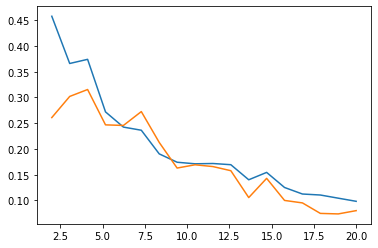

In [26]:
x = np.linspace(2, 20, 18)
plt.plot(X_plot, y_pca_rand)
plt.plot(X_plot, y_pca_sil)
plt.show()

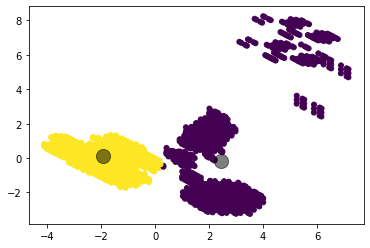

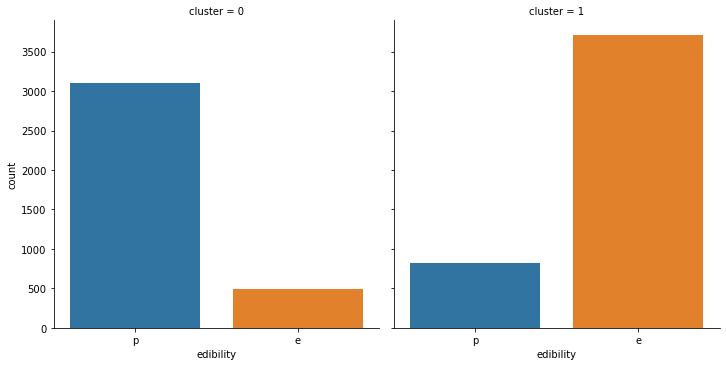

In [32]:
k_pca_rand = max(range(len(y_pca_rand)), key=y_pca_rand.__getitem__) + 2

kmeans = KMeans(n_clusters=k_pca_rand)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=25, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, edgecolor='black')

cluster_df = pd.DataFrame()
cluster_df['cluster'] = y_kmeans
cluster_df['edibility'] = y
sns.catplot(col='cluster', y=None, x='edibility', data=cluster_df, kind='count')

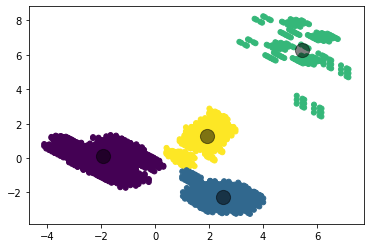

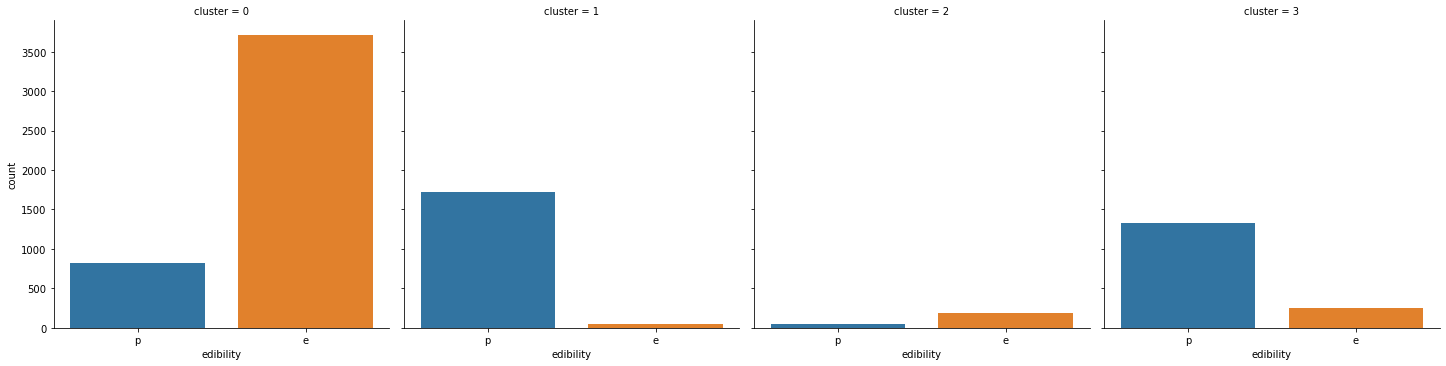

In [33]:
k_pca_sil = max(range(len(y_pca_sil)), key=y_pca_sil.__getitem__) + 2

kmeans = KMeans(n_clusters=k_pca_sil)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, s=25, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5, edgecolor='black')

cluster_df = pd.DataFrame()
cluster_df['cluster'] = y_kmeans
cluster_df['edibility'] = y
sns.catplot(col='cluster', y=None, x='edibility', data=cluster_df, kind='count')